In [1]:
import pandas as pd
import sys

In [2]:
# xls to xlsx
import win32com.client as win32

In [46]:
year = 2020
month = 6
weeks = 1
vegetable_name = '배추'
cnt = 0

while month >= 6 and month <= 10:
    globals()['Jeju_{}_{}'.format(month, year)] = []
    globals()['Seoul_{}_{}'.format(month, year)] = []
    globals()['Daejeon_{}_{}'.format(month, year)] = []
    globals()['Jeonju_{}_{}'.format(month, year)] = []
    
    try:
        while True:
            fname = "C:\\Users\\YSM\\Downloads\\{} {}년 {}월 {}주.xls".format(vegetable_name, year, month, weeks)
            excel = win32.gencache.EnsureDispatch('Excel.Application')
            wb = excel.Workbooks.Open(fname)

            wb.SaveAs(fname+"x", FileFormat = 51)
            wb.Close()
            excel.Application.Quit()
            df = pd.read_excel('C:\\Users\\YSM\\Downloads\\{} {}년 {}월 {}주.xlsx'.format(vegetable_name, year, month, weeks))

            weeks += 1

            length = len(df.iloc[-1]) - 6

            # Seoul
            Seoul_price_list = []
            Seoul_idx = df[df['구분'] == '서울'].index
            Busan_idx = df[df['구분'] == '부산'].index
            Seoul_df = df.iloc[Seoul_idx.tolist()[0]:Busan_idx.tolist()[0]]
            Seoul_price = 0
            temp = Seoul_df[Seoul_df['Unnamed: 1'] == '경동'].index.tolist()[0]
            
            for i in range(length):
                x = Seoul_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                    print(month, weeks)
                Seoul_price_list.append(int(x))
                
            Seoul_avg = sum(Seoul_price_list) / length - cnt
            globals()['Seoul_{}_{}'.format(month, year)].append(round(Seoul_avg, 2))
            cnt = 0

            # Daejeon
            Daejeon_price_list = []
            Daejeon_idx = df[df['구분'] == '대전'].index
            Ulsan_idx = df[df['구분'] == '울산'].index
            Daejeon_df = df.iloc[Daejeon_idx.tolist()[0]:Ulsan_idx.tolist()[0]]
            Daejeon_price = 0
            temp = Daejeon_df[Daejeon_df['Unnamed: 1'] == '역전'].index.tolist()[0]
            
            for i in range(length):
                x = Daejeon_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Daejeon_price_list.append(int(x))
                
            Daejeon_avg = sum(Daejeon_price_list) / length - cnt
            globals()['Daejeon_{}_{}'.format(month, year)].append(round(Daejeon_avg, 2))
            cnt = 0

            # Jeonju
            Jeonju_price_list = []
            Jeonju_idx = df[df['구분'] == '전주'].index
            Suncheon_idx = df[df['구분'] == '순천'].index
            Jeonju_df = df.iloc[Jeonju_idx.tolist()[0]:Suncheon_idx.tolist()[0]]
            Jeonju_price = 0
            temp = Jeonju_df[Jeonju_df['Unnamed: 1'] == '남부'].index.tolist()[0]
            for i in range(length):
                x = Jeonju_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Jeonju_price_list.append(int(x))
            Jeonju_avg = sum(Jeonju_price_list) / length - cnt
            globals()['Jeonju_{}_{}'.format(month, year)].append(round(Jeonju_avg, 2))
            cnt = 0

            # Jeju
            Jeju_price_list = []
            Jeju_idx = df[df['구분'] == '제주'].index
            Jeju_df = df.iloc[Jeju_idx.tolist()[0]:]
            Jeju_price = 0
            temp = Jeju_df[Jeju_df['Unnamed: 1'] == '동문'].index.tolist()[0]
            for i in range(length):
                x = Jeju_df.iloc[0][3:9][i].replace(',', '')
                if x == '-':
                    x = 0
                    cnt += 1
                Jeju_price_list.append(int(x))
            Jeju_avg = sum(Jeju_price_list) / length - cnt
            globals()['Jeju_{}_{}'.format(month, year)].append(round(Jeju_avg, 2))
            cnt = 0

    except:
#         print(sys.exc_info())
        print("Month Over!")
        month += 1
        weeks = 1

(<class 'pywintypes.com_error'>, com_error(-2147352567, '예외가 발생했습니다.', (0, 'Microsoft Excel', "'C:\\Users\\YSM\\Downloads\\배추 2020년 6월 5주.xls'을(를) 찾을 수 없습니다. 파일의 이름이 변경되었거나 파일이 이동 또는 삭제되지 않았는지 확인하세요.", 'xlmain11.chm', 0, -2146827284), None), <traceback object at 0x00000171FFC2AF08>)
Month Over!
(<class 'pywintypes.com_error'>, com_error(-2147352567, '예외가 발생했습니다.', (0, 'Microsoft Excel', "'C:\\Users\\YSM\\Downloads\\배추 2020년 7월 6주.xls'을(를) 찾을 수 없습니다. 파일의 이름이 변경되었거나 파일이 이동 또는 삭제되지 않았는지 확인하세요.", 'xlmain11.chm', 0, -2146827284), None), <traceback object at 0x00000171FFBF5A88>)
Month Over!
(<class 'pywintypes.com_error'>, com_error(-2147352567, '예외가 발생했습니다.', (0, 'Microsoft Excel', "'C:\\Users\\YSM\\Downloads\\배추 2020년 8월 5주.xls'을(를) 찾을 수 없습니다. 파일의 이름이 변경되었거나 파일이 이동 또는 삭제되지 않았는지 확인하세요.", 'xlmain11.chm', 0, -2146827284), None), <traceback object at 0x00000171FFC6EE48>)
Month Over!
(<class 'pywintypes.com_error'>, com_error(-2147352567, '예외가 발생했습니다.', (0, 'Microsoft Excel', "'C:\\Users\\YSM\\

In [85]:
Jeju_result = []
Seoul_result = []
Daejeon_result = []
Jeonju_result = []

In [84]:
# ----------------------------- Jeju ---------------------------------- #
print(Jeju_7_2020)
try:
    for i in range(4, -1, -1):
        Jeju_result.append(Jeju_10_2020[i])
except:
    for i in range(4):
        Jeju_result.append(Jeju_10_2020[i])

[6330.0, 6330.0, 6330.0, 5274.0, 3998.0]


In [54]:
Jeju_result

[4218.0,
 6330.0,
 6330.0,
 6330.0,
 3998.0,
 5274.0,
 6330.0,
 6330.0,
 6330.0,
 6000.0,
 6443.33,
 7330.0,
 8443.33,
 9220.0,
 9696.67,
 11656.67,
 12933.33,
 7830.0,
 10206.67,
 13600.0,
 13600.0,
 13600.0]

In [59]:
# ----------------------------- Seoul ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Seoul_result.append(Seoul_10_2020[i])
except:
    for i in range(4):
        Seoul_result.append(Seoul_10_2020[i])

In [60]:
Seoul_result

[4968.33,
 4551.67,
 4998.33,
 5110.0,
 6940.0,
 2439.33,
 3549.67,
 4660.0,
 4858.33,
 7328.33,
 8106.67,
 9388.0,
 11550.0,
 11216.67,
 11816.67,
 13066.67,
 14300.0,
 4746.67,
 5941.67,
 8260.0,
 13300.0,
 14300.0]

In [65]:
# ----------------------------- Daejeon ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Daejeon_result.append(Daejeon_10_2020[i])
except:
    for i in range(4):
        Daejeon_result.append(Daejeon_10_2020[i])

In [66]:
Daejeon_result

[4416.67,
 3416.67,
 3833.33,
 4166.67,
 6000.0,
 4832.33,
 5250.0,
 4500.0,
 4500.0,
 6500.0,
 7583.33,
 8300.0,
 9250.0,
 9333.33,
 9833.33,
 11416.67,
 11416.67,
 2747.0,
 5833.33,
 7600.0,
 10250.0,
 11833.33]

In [72]:
# ----------------------------- Jeonju ---------------------------------- #
month_price = 0
try:
    for i in range(4, -1, -1):
        Jeonju_result.append(Jeonju_10_2020[i])
except:
    for i in range(4):
        Jeonju_result.append(Jeonju_10_2020[i])

In [73]:
Jeonju_result

[4526.67,
 4000.0,
 4000.0,
 4055.0,
 4440.67,
 3970.67,
 4333.33,
 4000.0,
 4110.0,
 5550.0,
 6610.0,
 7264.0,
 8385.0,
 8996.67,
 8938.33,
 9830.0,
 10866.67,
 828.33,
 5333.33,
 7400.0,
 10400.0,
 11500.0]

In [74]:
df_20 = pd.DataFrame([Jeju_result, Seoul_result, Daejeon_result, Jeonju_result], index='Jeju Seoul Daejeon Jeonju'.split())
df_2020 = df_20.fillna(df.iloc[1])
df_2020 = df_2020.T
df_2020

,Jeju,Seoul,Daejeon,Jeonju
0,4218.00,4968.33,4416.67,4526.67
1,6330.00,4551.67,3416.67,4000.00
2,6330.00,4998.33,3833.33,4000.00
3,6330.00,5110.00,4166.67,4055.00
4,3998.00,6940.00,6000.00,4440.67
5,5274.00,2439.33,4832.33,3970.67
6,6330.00,3549.67,5250.00,4333.33
7,6330.00,4660.00,4500.00,4000.00
8,6330.00,4858.33,4500.00,4110.00
9,6000.00,7328.33,6500.00,5550.00


In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

month_week_list = ['6/1', '6/2', '6/3', '6/4', '7/1', '7/2', '7/3', '7/4', '7/5', '8/1', '8/2', '8/3', '8/4', '9/1', '9/2', '9/3', '9/4', '10/1', '10/2', '10/3', '10/4', '10/5']

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,4)

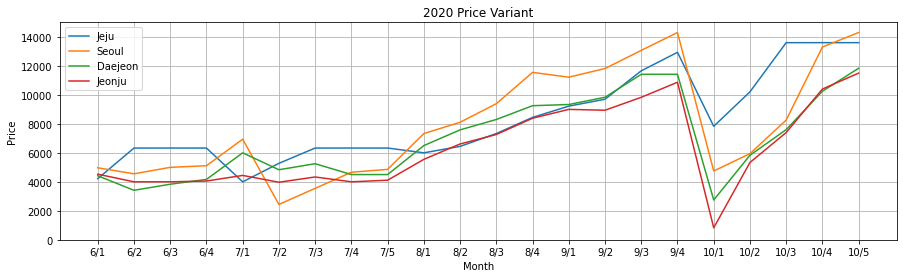

In [81]:
line = df_2020.plot.line()
line.set_xlabel("Month")
line.set_ylabel("Price")
plt.ylim([0, 15000])
line.set_title("2020 Price Variant")
line.set_xticks(df_2020.index[:])
line.set_xticklabels(month_week_list)
plt.plot
plt.show()